Trying to find the best model

Perform correlation analysis between the electrical load and the meteorological variables temperature and  humidity using
Pearson product-moment correlation coefficient formula. Please give the code for this and show the results in a table


Certainly! You can use the corr method in pandas to calculate the Pearson correlation coefficients between the electrical load and the meteorological variables (temperature and humidity). Here's an example code:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/Ercot_Dataset/ERCOT_2012_to_2015_With_National_Holidays.csv'

In [ ]:
# Load the dataset into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head(5)

,Date,Day of Week(0-6),Day of the Month(1-31),Month of the Year(1-12),Time of Day(0-23),Holidays,Humidity,Temperature,Load WEST
0,1/1/2012,6,1,1,1,1,34.89,13.2,849.000892
1,1/1/2012,6,1,1,2,1,37.89,12.0,845.097364
2,1/1/2012,6,1,1,3,1,46.46,10.2,840.902849
3,1/1/2012,6,1,1,4,1,54.48,8.4,845.452257
4,1/1/2012,6,1,1,5,1,63.22,6.6,862.369386


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     35064 non-null  object 
 1   Day of Week(0-6)         35064 non-null  int64  
 2   Day of the Month(1-31)   35064 non-null  int64  
 3   Month of the Year(1-12)  35064 non-null  int64  
 4   Time of Day(0-23)        35064 non-null  int64  
 5   Holidays                 35064 non-null  int64  
 6   Humidity                 35064 non-null  float64
 7   Temperature              35064 non-null  float64
 8   Load WEST                35064 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 2.4+ MB


In [ ]:
# Convert the 'Load WEST' column to numeric (remove commas)
df['Load WEST'] = df['Load WEST'].replace(',', '', regex=True).astype(float)

In [ ]:
df.head(5)

,Date,Day of Week(0-6),Day of the Month(1-31),Month of the Year(1-12),Time of Day(0-23),Holidays,Humidity,Temperature,Load WEST
0,1/1/2012,6,1,1,1,1,34.89,13.2,849.000892
1,1/1/2012,6,1,1,2,1,37.89,12.0,845.097364
2,1/1/2012,6,1,1,3,1,46.46,10.2,840.902849
3,1/1/2012,6,1,1,4,1,54.48,8.4,845.452257
4,1/1/2012,6,1,1,5,1,63.22,6.6,862.369386


In [ ]:
# Extract features and target variable
features = ['Day of Week(0-6)', 'Day of the Month(1-31)', 'Month of the Year(1-12)', 'Time of Day(0-23)', 'Holidays', 'Humidity','Temperature']
target_variable = 'Load WEST'
data = df[['Day of Week(0-6)', 'Day of the Month(1-31)', 'Month of the Year(1-12)', 'Time of Day(0-23)', 'Holidays','Humidity','Temperature', 'Load WEST']]

In [ ]:
# Normalize data using Min-Max normalization
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [ ]:
# Function to prepare sequences for LSTM
def prepare_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :])
        y.append(data[i + look_back, -1])  # Assuming Load WEST is the last column
    return np.array(X), np.array(y)

# Set the look-back window
look_back = 10 # Adjust this value based on your analysis


In [ ]:
# Prepare sequences
X, y = prepare_sequences(data_normalized, look_back)

In [ ]:
X.shape

(35054, 10, 8)

In [ ]:
y.shape

(35054,)

In [ ]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train.shape

(24537, 10, 8)

In [ ]:
X_train.shape[1]

10

In [ ]:
y_train.shape

(24537,)

In [ ]:
# Build LSTM model
model = Sequential()
model.add(GRU(units=10, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(units=5))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val),verbose=1,
          callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/200
767/767 [==============================] - 17s 15ms/step - loss: 0.0206 - val_loss: 0.0036
Epoch 2/200
767/767 [==============================] - 10s 13ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 3/200
767/767 [==============================] - 14s 18ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 4/200
767/767 [==============================] - 10s 13ms/step - loss: 9.3368e-04 - val_loss: 7.1324e-04
Epoch 5/200
767/767 [==============================] - 11s 15ms/step - loss: 6.0546e-04 - val_loss: 5.0419e-04
Epoch 6/200
767/767 [==============================] - 12s 15ms/step - loss: 4.3666e-04 - val_loss: 3.5014e-04
Epoch 7/200
767/767 [==============================] - 11s 14ms/step - loss: 3.6478e-04 - val_loss: 3.1154e-04
Epoch 8/200
767/767 [==============================] - 10s 13ms/step - loss: 3.3216e-04 - val_loss: 3.0677e-04
Epoch 9/200
767/767 [==============================] - 12s 15ms/step - loss: 3.1701e-04 - val_loss: 2.7625e-04
Epoch 10/200
767/767 [===

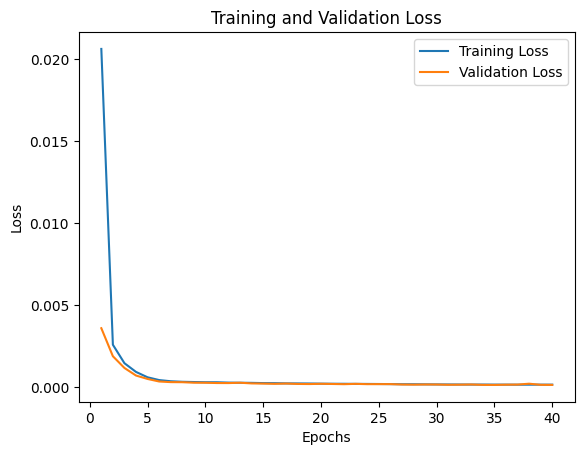

In [ ]:
import matplotlib.pyplot as plt
# Extract loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss curves
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
X_test[:, -1, :-1].shape

(5259, 7)

In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Invert the predictions and actual values to compare with the original scale
predictions_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], predictions), axis=1))[:, -1]
y_test_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]


165/165 [==============================] - 1s 3ms/step


In [ ]:
# Evaluate the model
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(y_test_original, predictions_original)
rmse = np.sqrt(mean_squared_error(y_test_original, predictions_original))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 10.980140100387983
Root Mean Squared Error (RMSE): 15.11687651398677


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_original, predictions_original)
r2 = r2_score(y_test_original, predictions_original)

print(f'Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%')
print(f'R-squared (R2): {r2:.4f}')

Mean Absolute Percentage Error (MAPE): 1.01%
R-squared (R2): 0.9957


In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, predictions_original)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 228.5199555391248


Hyperparameter search

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have X_train, y_train, X_val, y_val defined

# Function to build the model
def build_model(hp):
    model = Sequential()

    # Tune the number of LSTM units
    model.add(GRU(units=hp.Int('units', min_value=30, max_value=80, step=10),
                   return_sequences=True,
                   input_shape=(X_train.shape[1], X_train.shape[2])))

    # Tune the number of intermediate LSTM layers
    for _ in range(hp.Int('num_layers', min_value=1, max_value=5)):
        model.add(GRU(units=hp.Int('units', min_value=30, max_value=80, step=10), return_sequences=True))

    # Manually set return_sequences=False for the last LSTM layer
    model.add(GRU(units=hp.Int('units_last', min_value=30, max_value=80, step=10), return_sequences=False))

    # Dense layer for final prediction
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Define the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Adjust as needed
    executions_per_trial=1,
    directory='my_tuner_directory',
    project_name='lstm_tuning'
)

# Early stopping to stop training when the validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Perform the search
tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the final model with the best hyperparameters
final_model = build_model(best_hps)


Trial 5 Complete [00h 06m 17s]
val_loss: 0.000141484328196384

Best val_loss So Far: 0.00010982767707901075
Total elapsed time: 00h 57m 29s


In [ ]:
best_hps

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Number of Units: {best_hps.get('units')}")
print(f"Number of Intermediate Layers: {best_hps.get('num_layers')}")
print(f"Number of Units in Last Layer: {best_hps.get('units_last')}")

Best Hyperparameters:
Number of Units: 60
Number of Intermediate Layers: 2
Number of Units in Last Layer: 50


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Function to build the model with specific hyperparameters
def build_model_with_params(units, num_layers, units_last, input_shape):
    model = Sequential()

    # Add the first LSTM layer
    model.add(GRU(units=units, return_sequences=True, input_shape=input_shape))

    # Add intermediate LSTM layers
    for _ in range(num_layers):
        model.add(GRU(units=units, return_sequences=True))

    # Add the last LSTM layer with return_sequences=False
    model.add(GRU(units=units_last, return_sequences=False))

    # Add a Dense layer for final prediction
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Best Hyperparameters obtained from tuning
best_units = 60
best_num_layers = 2
best_units_last = 50

# Input shape based on your data
# input_shape = (X_train.shape[1], X_train.shape[2])

# Automate for different look-back windows
look_back_values = [2, 4 ,6, 8 ,10 ,12 ,14,16,18,20,22]

for look_back in look_back_values:
    X, y = prepare_sequences(data_normalized, look_back)

    # Split the data into training, validation, and testing sets
    X_train_current, X_temp, y_train_current, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val_current, X_test, y_val_current, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Build the model with specific hyperparameters
    current_model = build_model_with_params(units=best_units, num_layers=best_num_layers, units_last=best_units_last, input_shape=(X_train_current.shape[1], X_train_current.shape[2]))


    # Prepare sequences with the current look_back
   # X_train_current, y_train_current = prepare_sequences(X_train, look_back)
   # X_val_current, y_val_current = prepare_sequences(X_val, look_back)

    # Train the model with EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    current_model.fit(X_train_current, y_train_current, epochs=100, validation_data=(X_val_current, y_val_current), callbacks=[early_stopping])

    # Make predictions on the validation set
    y_test_pred = current_model.predict(X_test)

    # Invert the predictions and actual values to compare with the original scale
    predictions_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test_pred.reshape(-1, 1)), axis=1))[:, -1]
    y_test_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]

    # Calculate and print metrics
    mse = mean_squared_error(y_test_original, predictions_original)
    mae = mean_absolute_error(y_test_original, predictions_original)
    mape = mean_absolute_percentage_error(y_test_original, predictions_original)*100
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_original, predictions_original)

    print(f"Look Back: {look_back}")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")
    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    print("--------------------")




Epoch 1/100
767/767 [==============================] - 22s 17ms/step - loss: 0.0047 - val_loss: 6.3812e-04
Epoch 2/100
767/767 [==============================] - 11s 14ms/step - loss: 4.3719e-04 - val_loss: 3.7494e-04
Epoch 3/100
767/767 [==============================] - 10s 12ms/step - loss: 4.0432e-04 - val_loss: 3.2754e-04
Epoch 4/100
767/767 [==============================] - 11s 14ms/step - loss: 3.7707e-04 - val_loss: 4.6199e-04
Epoch 5/100
767/767 [==============================] - 10s 14ms/step - loss: 3.7658e-04 - val_loss: 3.8038e-04
Epoch 6/100
767/767 [==============================] - 10s 13ms/step - loss: 3.6863e-04 - val_loss: 3.6117e-04
Epoch 7/100
767/767 [==============================] - 11s 14ms/step - loss: 3.6341e-04 - val_loss: 2.9842e-04
Epoch 8/100
767/767 [==============================] - 11s 14ms/step - loss: 3.5742e-04 - val_loss: 3.1574e-04
Epoch 9/100
767/767 [==============================] - 8s 11ms/step - loss: 3.4631e-04 - val_loss: 2.9573e-04
Epoch 

In [ ]:
# Train the final model
history = final_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate on the test set
test_loss = final_model.evaluate(X_test, y_test)

# You can access the best model using the 'best_model' variable

Epoch 1/100
767/767 [==============================] - 35s 33ms/step - loss: 0.0035 - val_loss: 3.7602e-04
Epoch 2/100
767/767 [==============================] - 26s 34ms/step - loss: 4.0728e-04 - val_loss: 3.2860e-04
Epoch 3/100
767/767 [==============================] - 22s 29ms/step - loss: 3.8384e-04 - val_loss: 3.7993e-04
Epoch 4/100
767/767 [==============================] - 27s 35ms/step - loss: 3.3247e-04 - val_loss: 3.5643e-04
Epoch 5/100
767/767 [==============================] - 23s 30ms/step - loss: 3.3417e-04 - val_loss: 3.4676e-04
Epoch 6/100
767/767 [==============================] - 25s 33ms/step - loss: 2.9897e-04 - val_loss: 2.3138e-04
Epoch 7/100
767/767 [==============================] - 23s 30ms/step - loss: 2.7617e-04 - val_loss: 2.3776e-04
Epoch 8/100
767/767 [==============================] - 26s 34ms/step - loss: 2.6673e-04 - val_loss: 3.0497e-04
Epoch 9/100
767/767 [==============================] - 24s 31ms/step - loss: 2.4677e-04 - val_loss: 2.2070e-04
Epoch

In [ ]:
X_test.shape

(5259, 10, 8)

In [ ]:
X_test[:, -1, :].shape

(5259, 8)

In [ ]:
# Make predictions
predictions = final_model.predict(X_test)

165/165 [==============================] - 3s 7ms/step


In [ ]:
predictions.shape

(5259, 1)

In [ ]:
y_test.shape

(5259,)

In [ ]:
# Invert the predictions and actual values to compare with the original scale
predictions_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], predictions), axis=1))[:, -1]
y_test_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_original, predictions_original)
r2 = r2_score(y_test_original, predictions_original)

print(f'Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%')
print(f'R-squared (R2): {r2:.4f}')

Mean Absolute Percentage Error (MAPE): 0.92%
R-squared (R2): 0.9963


In [ ]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test_original, predictions_original)
rmse = np.sqrt(mean_squared_error(y_test_original, predictions_original))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 10.102803691776177
Root Mean Squared Error (RMSE): 13.979501529626408


In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, predictions_original)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 195.42646301682706


Voting Regressor for model fusion

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Build the LGBM model
lgb_model = lgb.LGBMRegressor()  # You can add hyperparameters here if needed

# Train the LGBM model
lgb_model.fit(X_train[:, -1, :], y_train)

# Make predictions using the final GRU model and LGBM model
gru_predictions = final_model.predict(X_test)
lgb_predictions = lgb_model.predict(X_test[:, -1, :])

# Ensure the number of samples in both predictions is the same
assert gru_predictions.shape[0] == lgb_predictions.shape[0], "Number of samples in predictions must match."

# Stack the predictions as features
stacked_features_test = np.column_stack((gru_predictions, lgb_predictions))

# Train a final model (e.g., Linear Regression) on the stacked features
final_model = Sequential()
final_model.add(Dense(units=1, input_dim=stacked_features_test.shape[1]))  # Adjust units based on your needs
final_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the final model
final_model.fit(stacked_features_test, y_test, epochs=50, validation_split=0.2)  # You can adjust the validation split

# Evaluate the final model
test_loss_final = final_model.evaluate(stacked_features_test, y_test)
print("Test Loss for the Final Model:", test_loss_final)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 24537, number of used features: 8
[LightGBM] [Info] Start training from score 0.371520
165/165 [==============================] - 1s 7ms/step
Epoch 1/50
132/132 [==============================] - 1s 3ms/step - loss: 0.0739 - val_loss: 0.0304
Epoch 2/50
132/132 [==============================] - 1s 11ms/step - loss: 0.0183 - val_loss: 0.0091
Epoch 3/50
132/132 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0063
Epoch 4/50
132/132 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0053
Epoch 5/50
132/132 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0043
Epoch 6/50
132/132 [====================

In [ ]:
#Make predictions using the final model
final_predictions = final_model.predict(stacked_features_test)

# Invert the predictions and actual values to compare with the original scale
final_predictions_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], final_predictions), axis=1))[:, -1]
y_test_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Evaluate the final model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Calculate MAE
mae_final = mean_absolute_error(y_test_original, final_predictions_original)

# Calculate RMSE
rmse_final = np.sqrt(mean_squared_error(y_test_original, final_predictions_original))

# Calculate MAPE
mape_final = mean_absolute_percentage_error(y_test_original, final_predictions_original)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE) for the Final Model: {mae_final}')
print(f'Root Mean Squared Error (RMSE) for the Final Model: {rmse_final}')
print(f'Mean Absolute Percentage Error (MAPE) for the Final Model: {mape_final * 100:.2f}%')

165/165 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE) for the Final Model: 9.436770874748655
Root Mean Squared Error (RMSE) for the Final Model: 13.32848287326587
Mean Absolute Percentage Error (MAPE) for the Final Model: 0.86%


In [ ]:
!pip install seaborn matplotlib


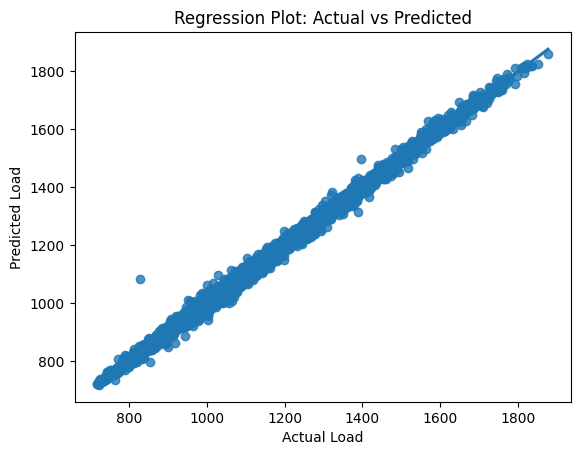

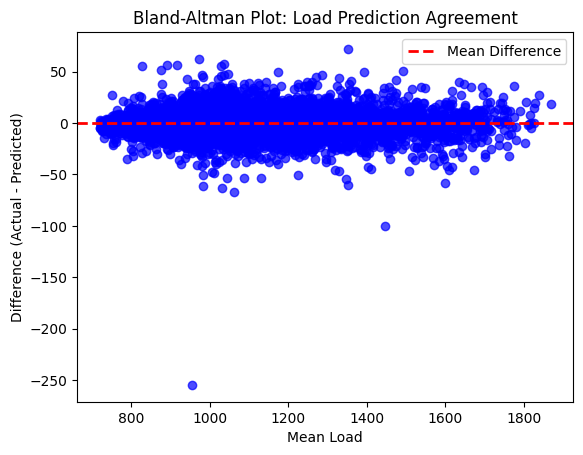

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Regression plot
sns.regplot(x=y_test_original, y=final_predictions_original)
plt.title('Regression Plot: Actual vs Predicted')
plt.xlabel('Actual Load')
plt.ylabel('Predicted Load')
plt.show()

# Bland-Altman plot
mean_load = (y_test_original + final_predictions_original) / 2
diff_load = y_test_original - final_predictions_original

plt.scatter(mean_load, diff_load, color='blue', alpha=0.7)
plt.axhline(np.mean(diff_load), color='red', linestyle='--', linewidth=2, label='Mean Difference')
plt.title('Bland-Altman Plot: Load Prediction Agreement')
plt.xlabel('Mean Load')
plt.ylabel('Difference (Actual - Predicted)')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Assuming you have the actual and predicted load values
actual_values = y_test_original  # Replace with your actual values
predicted_values = final_predictions_original  # Replace with your predicted values

# Calculate the correlation coefficient
correlation = np.corrcoef(actual_values, predicted_values)[0, 1]

print(f'Correlation between Actual and Predicted Load Values: {correlation:.4f}')


Correlation between Actual and Predicted Load Values: 0.9983


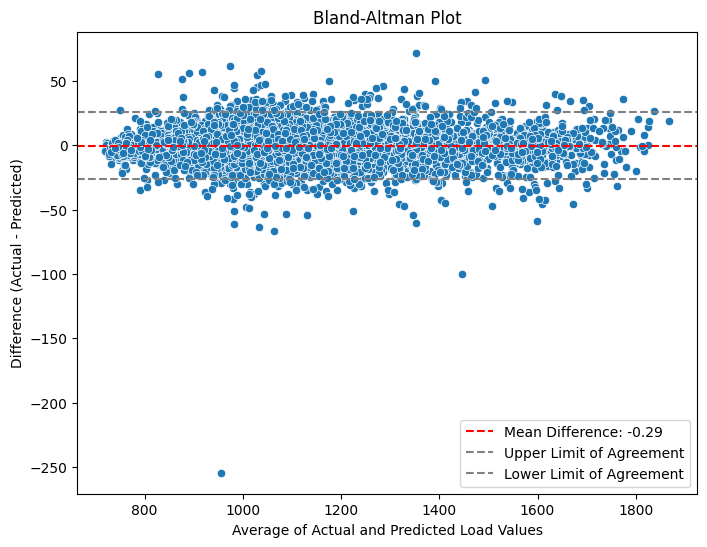

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the actual and predicted load values
actual_values = y_test_original  # Replace with your actual values
predicted_values = final_predictions_original  # Replace with your predicted values

# Calculate the differences and mean difference
differences = actual_values - predicted_values
mean_difference = np.mean(differences)

# Calculate the standard deviation of the differences
sd_difference = np.std(differences)

# Bland-Altman plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=(actual_values + predicted_values) / 2, y=differences)
plt.axhline(mean_difference, color='red', linestyle='--', label=f'Mean Difference: {mean_difference:.2f}')
plt.axhline(mean_difference + 1.96 * sd_difference, color='gray', linestyle='--', label=f'Upper Limit of Agreement')
plt.axhline(mean_difference - 1.96 * sd_difference, color='gray', linestyle='--', label=f'Lower Limit of Agreement')
plt.xlabel('Average of Actual and Predicted Load Values')
plt.ylabel('Difference (Actual - Predicted)')
plt.title('Bland-Altman Plot')
plt.legend()
plt.show()


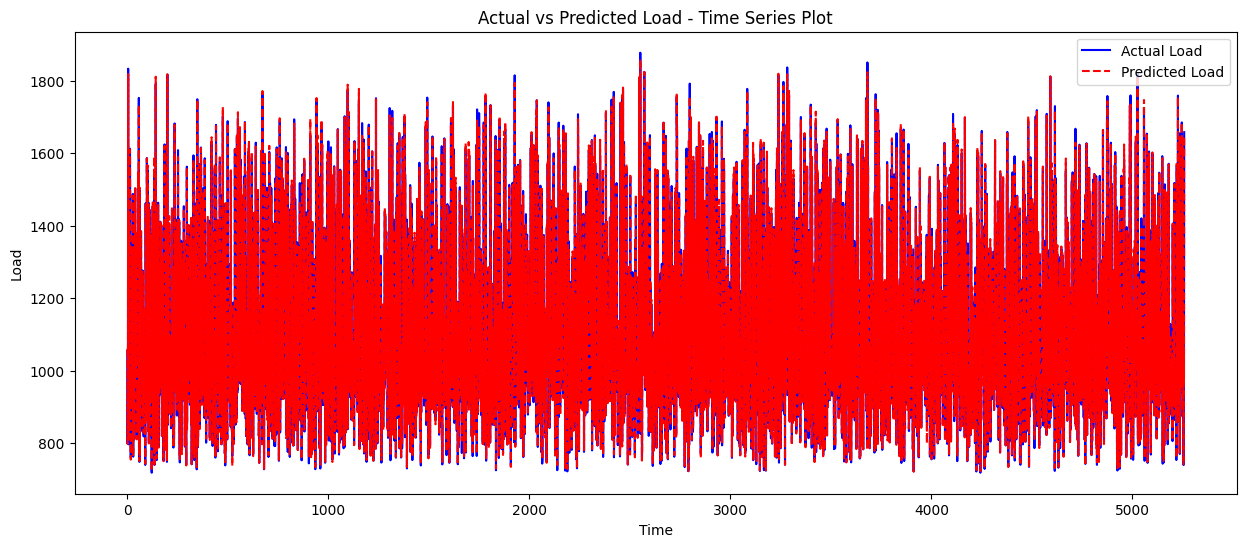

In [ ]:
# Time Series Plot
plt.figure(figsize=(15, 6))
plt.plot(y_test_original, label='Actual Load', color='blue')
plt.plot(final_predictions_original, label='Predicted Load', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Load - Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()

Results summary
Results in gru_tuner_directory/gru_tuning
Showing 10 best trials
Objective(name="val_loss", direction="min")


<ipython-input-113-5834e1dc4302>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


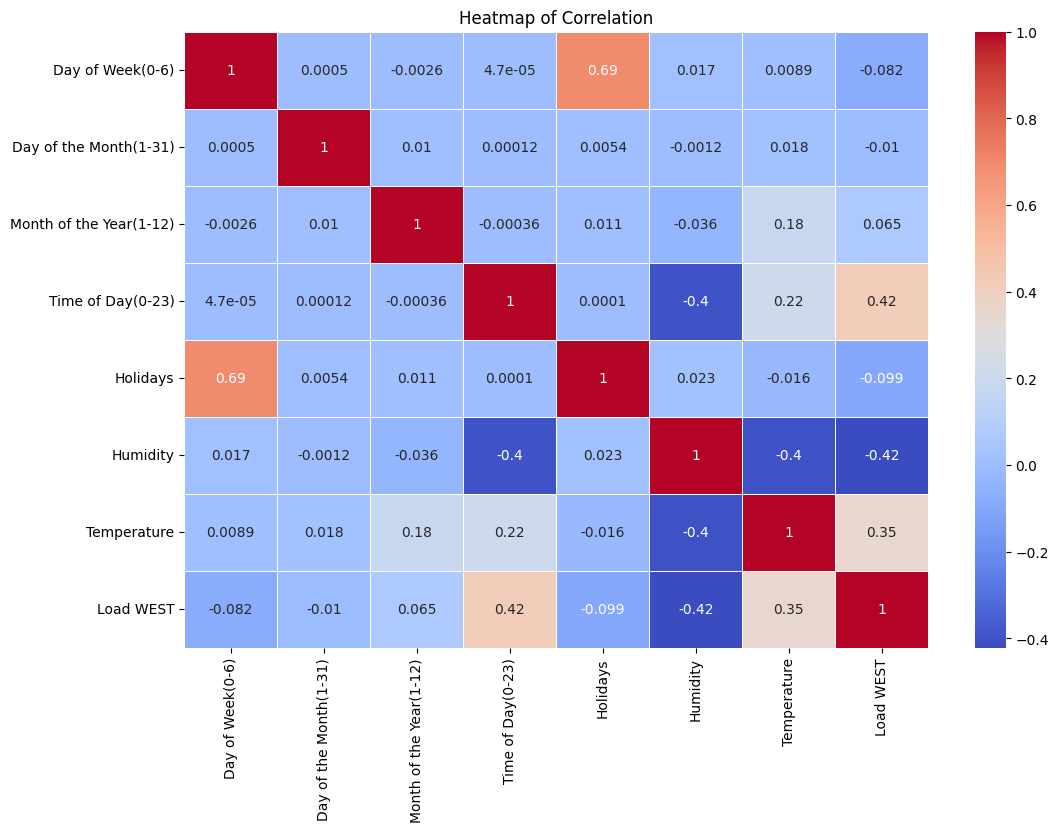

In [ ]:
# Hyperparameter Tuning Results
gru_tuner.results_summary()

# Heatmap of Correlation
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation')
plt.show()

Results summary
Results in gru_tuner_directory/gru_tuning
Showing 10 best trials
Objective(name="val_loss", direction="min")


<ipython-input-114-5834e1dc4302>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


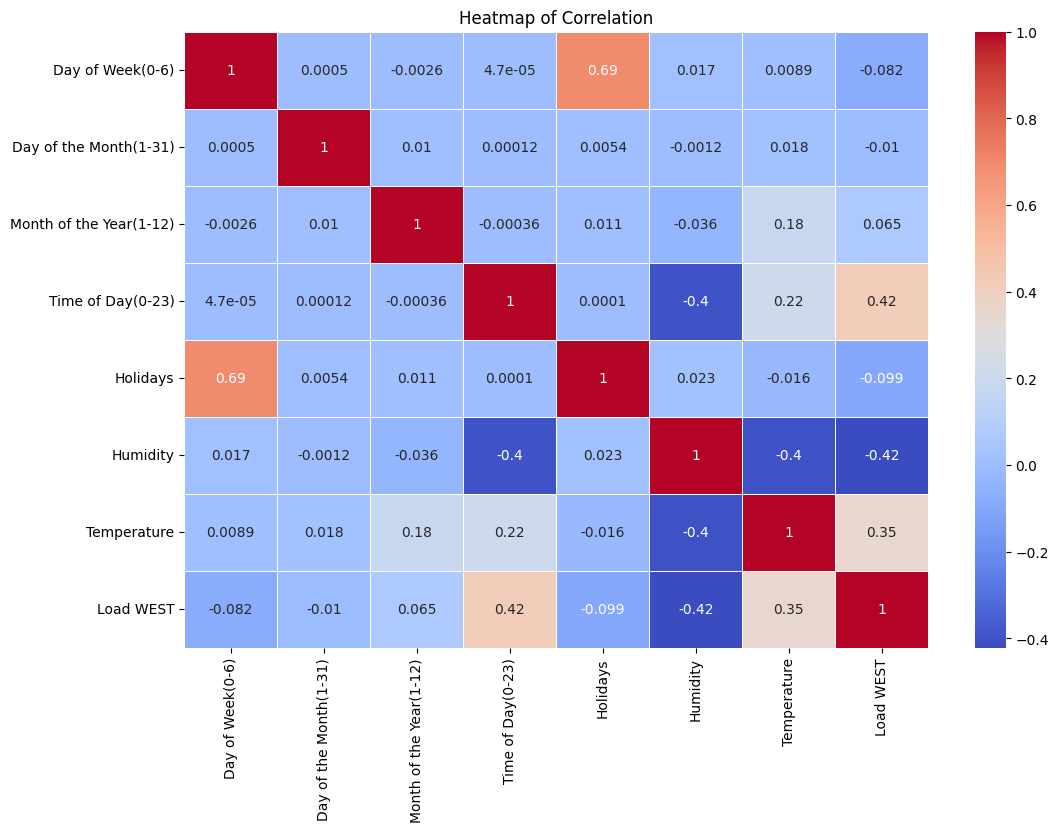

In [ ]:
# Hyperparameter Tuning Results
gru_tuner.results_summary()

# Heatmap of Correlation
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation')
plt.show()